In [81]:
import requests
apiKey = "?api_key=RGAPI-9a985905-02bb-4c57-925e-bbd7f742b4e7"

In [90]:
summonerName = "SmollBoo"

In [91]:
def getAccountId(name):
    url = "https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/"  + name + "/" + apiKey
    return requests.get(url).json()["accountId"]
    

In [92]:
accountId = getAccountId(summonerName)
accountId

'IrhKQCrZyarL4YkPnoiDXRXcBp84ZqurXy-OKaTrmuRKx9abyT2cd5Hg'

In [93]:

def getGameId(accountId, number):
    url = "https://na1.api.riotgames.com/lol/match/v4/matchlists/by-account/" + accountId + "/" + apiKey
    return requests.get(url).json()["matches"][number]['gameId']
def getChampId(accountId, number):
    url = "https://na1.api.riotgames.com/lol/match/v4/matchlists/by-account/" + accountId + "/" + apiKey
    return str(requests.get(url).json()["matches"][number]['champion'])
    

In [94]:
gameId = getGameId(accountId, 0)
champId = getChampId(accountId, 0)
teamId = 0
print(gameId)
print(champId)

3281250127
54


In [95]:
from IPython.display import Image
#championPool = requests.get("http://ddragon.leagueoflegends.com/cdn/10.2.1/data/en_US/champion.json").json()
championPool = {
    266: "Aatrox",
    103: "Ahri",
    84: "Akali",
    12: "Alistar",
    32: "Amumu",
    34: "Anivia",
    1: "Annie",
    523: "Aphelios",
    22: "Ashe",
    136: "AurelionSol",
    268: "Azir",
    432: "Bard",
    53: "Blitzcrank",
    63: "Brand",
    201: "Braum",
    51: "Caitlyn",
    164: "Camille",
    69: "Cassiopeia",
    31: "Chogath",
    42: "Corki",
    122: "Darius",
    131: "Diana",
    119: "Draven",
    36: "DrMundo",
    245: "Ekko",
    60: "Elise",
    28: "Evelynn",
    81: "Ezreal",
    9: "Fiddlesticks",
    114: "Fiora",
    105: "Fizz",
    3: "Galio",
    41: "Gangplank",
    86: "Garen",
    150: "Gnar",
    79: "Gragas",
    104: "Graves",
    120: "Hecarim",
    74: "Heimerdinger",
    420: "Illaoi",
    39: "Irelia",
    427: "Ivern",
    40: "Janna",
    59: "JarvanIV",
    24: "Jax",
    126: "Jayce",
    202: "Jhin",
    222: "Jinx",
    145: "Kaisa",
    429: "Kalista",
    43: "Karma",
    30: "Karthus",
    38: "Kassadin",
    55: "Katarina",
    10: "Kayle",
    141: "Kayn",
    85: "Kennen",
    121: "Khazix",
    203: "Kindred",
    240: "Kled",
    96: "KogMaw",
    7: "Leblanc",
    64: "LeeSin",
    89: "Leona",
    127: "Lissandra",
    236: "Lucian",
    117: "Lulu",
    99: "Lux",
    54: "Malphite",
    90: "Malzahar",
    57: "Maokai",
    11: "MasterYi",
    21: "MissFortune",
    62: "MonkeyKing",
    82: "Mordekaiser",
    25: "Morgana",
    267: "Nami",
    75: "Nasus",
    111: "Nautilus",
    518: "Neeko",
    76: "Nidalee",
    56: "Nocturne",
    20: "Nunu",
    2: "Olaf",
    61: "Orianna",
    516: "Ornn",
    80: "Pantheon",
    78: "Poppy",
    555: "Pyke",
    246: "Qiyana",
    133: "Quinn",
    497: "Rakan",
    33: "Rammus",
    421: "RekSai",
    58: "Renekton",
    107: "Rengar",
    92: "Riven",
    68: "Rumble",
    13: "Ryze",
    113: "Sejuani",
    235: "Senna",
    875: "Sett",
    35: "Shaco",
    98: "Shen",
    102: "Shyvana",
    27: "Singed",
    14: "Sion",
    15: "Sivir",
    72: "Skarner",
    37: "Sona",
    16: "Soraka",
    50: "Swain",
    517: "Sylas",
    134: "Syndra",
    223: "TahmKench",
    163: "Taliyah",
    91: "Talon",
    44: "Taric",
    17: "Teemo",
    412: "Thresh",
    18: "Tristana",
    48: "Trundle",
    23: "Tryndamere",
    4: "TwistedFate",
    29: "Twitch",
    77: "Udyr",
    6: "Urgot",
    110: "Varus",
    67: "Vayne",
    45: "Veigar",
    161: "Velkoz",
    254: "Vi",
    112: "Viktor",
    8: "Vladimir",
    106: "Volibear",
    19: "Warwick",
    498: "Xayah",
    101: "Xerath",
    5: "XinZhao",
    157: "Yasuo",
    83: "Yorick",
    350: "Yuumi",
    154: "Zac",
    238: "Zed",
    115: "Ziggs",
    26: "Zilean",
    142: "Zoe",
    143: "Zyra"
}
#for code in championPool:
#    display(Image("champion/" + championPool[code] + ".png"))

In [99]:
def displayHistory(numberOfGames):
    for i in range(0, numberOfGames):
        gameId = getGameId(accountId, i)
        champId = getChampId(accountId, i)
        url =  "https://na1.api.riotgames.com/lol/match/v4/matches/" + str(gameId) + apiKey
        particpants = requests.get(url).json()["participants"]
        kills =0;
        deaths =0;
        assists =0;
        for participant in particpants:
            if str(participant["championId"]) == champId:
                teamId = participant["teamId"]
                kills = participant["stats"]["kills"]
                deaths = participant["stats"]["deaths"]
                assists = participant["stats"]["assists"]
                display(Image("champion/" + championPool[int(champId)] + ".png"))
                if participant["stats"]["win"]:
                    print("\033[1;32;200m WIN  \n")

                else:
                    print("\033[1;31;200m LOSS  \n")
                print("YOU:  " + str(kills) + "/" + str(deaths) + "/" + str(assists))
        teamKills = 0;
        teamDeaths = 0;
        teamAssists = 0;
        for participant in particpants:
            if participant["teamId"] == teamId:
                teamKills += participant["stats"]["kills"]
                teamDeaths += participant["stats"]["deaths"]
                teamAssists += participant["stats"]["assists"]
        #print("TEAM: " + str(teamKills) + "/" + str(teamDeaths) + "/" + str(teamAssists) + "\n")
        print("TAVG: " + str((teamKills-kills)/4) + "/" + str((teamDeaths-deaths)/4) + "/" + str((teamAssists-assists)/4) + "\n")

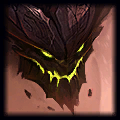

 WIN  

YOU:  10/11/13
TAVG: 11.25/13.0/8.75



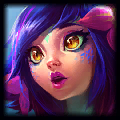

 LOSS  

YOU:  8/12/13
TAVG: 9.75/11.5/18.75



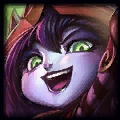

 LOSS  

YOU:  1/6/6
TAVG: 3.25/9.0/4.5



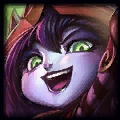

 LOSS  

YOU:  3/6/4
TAVG: 2.0/4.75/3.0



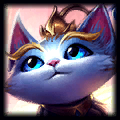

 LOSS  

YOU:  3/7/25
TAVG: 8.75/9.25/11.25



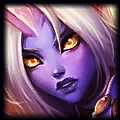

 WIN  

YOU:  0/1/10
TAVG: 5.25/2.0/4.5



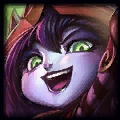

 LOSS  

YOU:  3/11/20
TAVG: 8.0/8.75/11.0



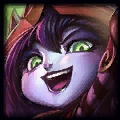

 LOSS  

YOU:  10/15/13
TAVG: 9.75/16.75/9.5



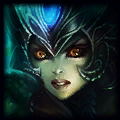

 LOSS  

YOU:  4/10/18
TAVG: 11.25/14.5/9.75



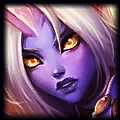

 WIN  

YOU:  6/10/33
TAVG: 15.75/11.5/18.25



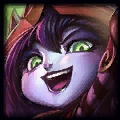

 WIN  

YOU:  2/6/19
TAVG: 7.25/7.0/10.0



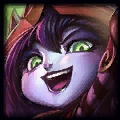

 WIN  

YOU:  2/4/25
TAVG: 10.75/5.25/8.5



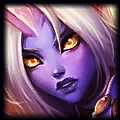

 WIN  

YOU:  2/1/16
TAVG: 5.75/3.75/7.0



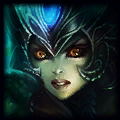

 WIN  

YOU:  1/8/13
TAVG: 8.25/4.75/10.75



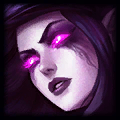

 WIN  

YOU:  0/0/0
TAVG: 0.0/0.0/0.0



In [100]:
displayHistory(15)